In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


import matplotlib

plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats as stats
from scipy import signal

import scipy.io




/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Get x values of the sine wave

time = np.arange(0, 20, 0.1);

# Amplitude of the sine wave is sine of a variable like time

amplitude = np.sin(time)

time_serie = pd.DataFrame({
                  'amplitude': amplitude},
                  index=time)

time_serie.index.name='timestamp'
time_serie


,amplitude
timestamp,
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
19.5,0.605540
19.6,0.681964
19.7,0.751573


In [3]:
noise = np.random.normal(loc=0, scale=0.3, size=time_serie.shape)

noisy_time_serie= time_serie + noise

noisy_time_serie_lagged=noisy_time_serie.shift(20)+ np.random.normal(loc=0, scale=0.5, size=time_serie.shape)


In [4]:

noisy_time_serie.rename(columns={"amplitude": "x(t)"})
noisy_time_serie_lagged.rename(columns={"amplitude": "y(t)"})

,y(t)
timestamp,
0.0,NaN
0.1,NaN
0.2,NaN
0.3,NaN
0.4,NaN
...,...
19.5,-1.668348
19.6,-1.441346
19.7,-1.169611


In [5]:
noisy_time_serie

,amplitude
timestamp,
0.0,0.149208
0.1,-0.239701
0.2,0.471466
0.3,0.615536
0.4,0.088380
...,...
19.5,0.211534
19.6,0.786843
19.7,0.932831


In [6]:
noisy_time_serie_lagged

,amplitude
timestamp,
0.0,NaN
0.1,NaN
0.2,NaN
0.3,NaN
0.4,NaN
...,...
19.5,-1.668348
19.6,-1.441346
19.7,-1.169611


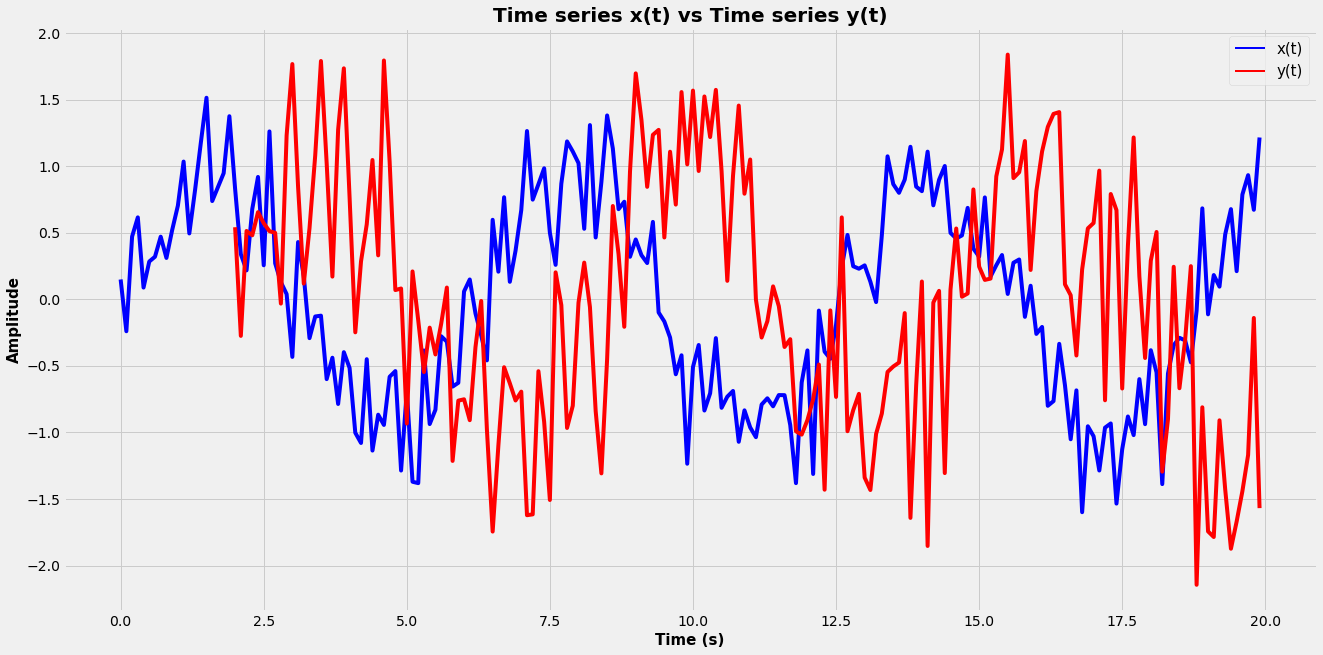

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot( noisy_time_serie, label="x(t)", color='blue')
ax.plot( noisy_time_serie_lagged, label="y(t)", color='red')
    
ax.set_title('Time series x(t) vs Time series y(t)', weight='bold', fontsize = 20)
ax.set_ylabel('Amplitude', weight='bold', fontsize = 15)
ax.set_xlabel('Time (s)', weight='bold', fontsize=15)
# Cria uma legenda personalizada para x(t) e y(t)
custom_legend = [
    plt.Line2D([0], [0], color='blue', lw=2),
    plt.Line2D([0], [0], color='red', lw=2)
]


# Adiciona a legenda personalizada ao gráfico
plt.legend(custom_legend, ['x(t)', 'y(t)'], fontsize=15)

plt.show()

In [8]:
def crosscorrelation_different_lags(s1_centred,s2_centred, product, lagMin,lagMax):  
    
    
    cc = []
    for lags in range(lagMin, lagMax+1):
        correlation = s1_centred.corr(s2_centred.shift(lags))
        cc.append([correlation])
    df_cc = pd.DataFrame(cc, columns=[product], index=range(lagMin, lagMax+1))
    return df_cc

# Chamada da função
df_cc = crosscorrelation_different_lags(noisy_time_serie['amplitude'], noisy_time_serie_lagged['amplitude'], 'Example', -20, 20)

In [9]:
df_cc

,Example
-20,0.872532
-19,0.729839
-18,0.675889
-17,0.709081
-16,0.679784
-15,0.650739
-14,0.617491
-13,0.558810
-12,0.548327
-11,0.465486


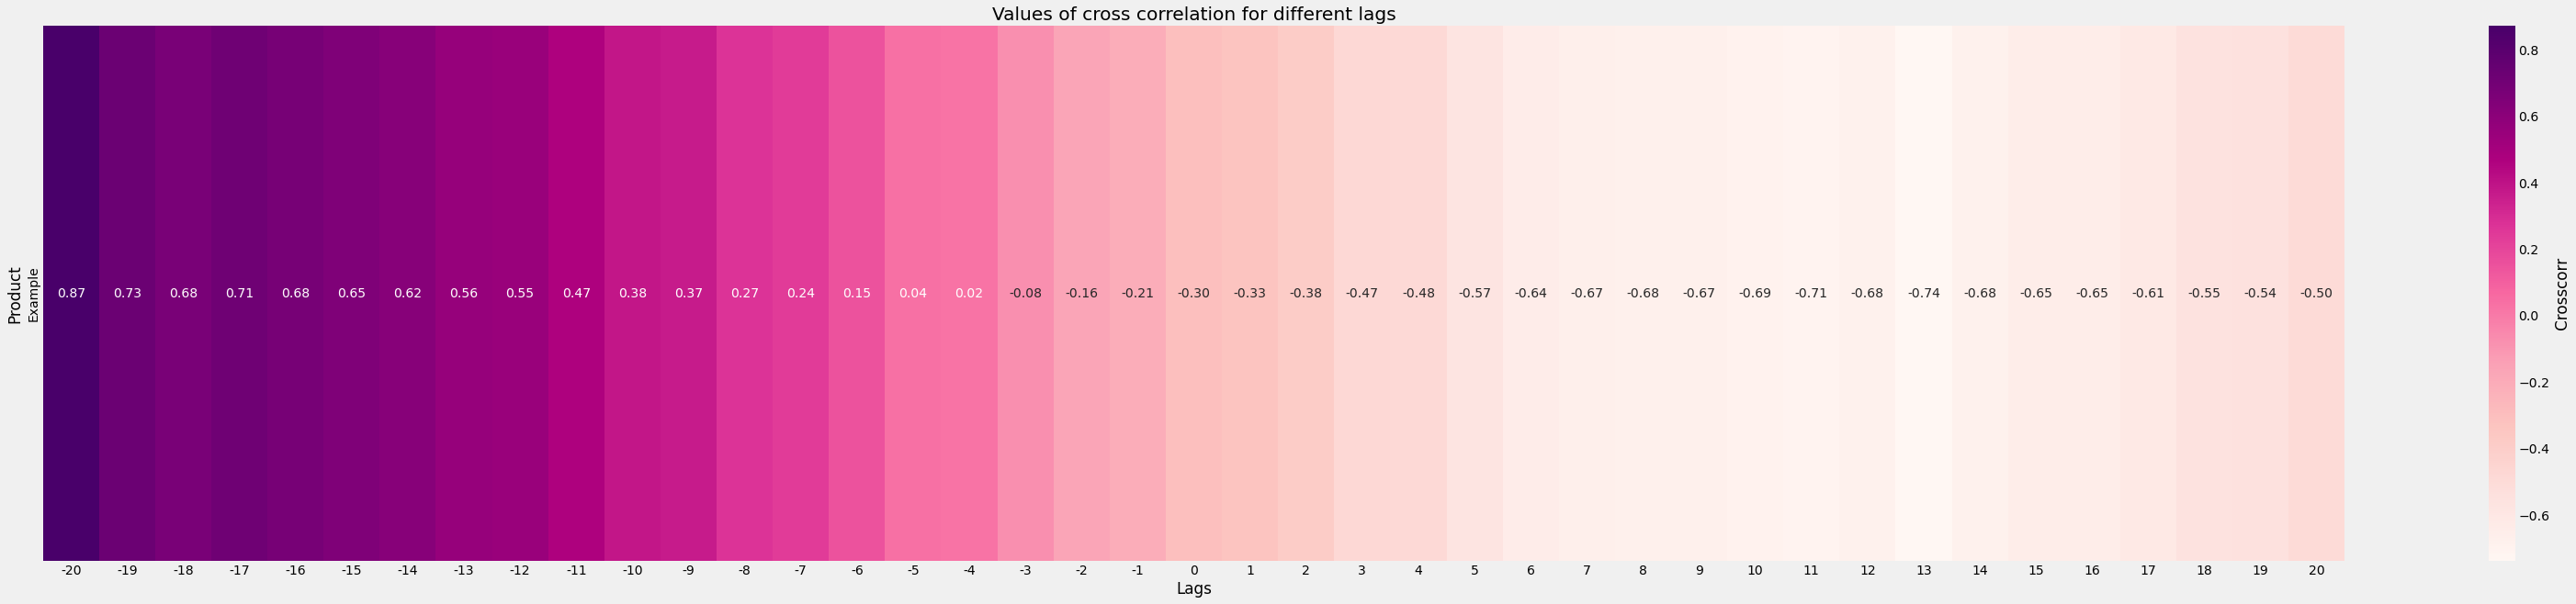

In [10]:
product="example"
plt.figure(figsize=(50, 10))
heatmap_pos = sns.heatmap(df_cc.T, cmap='RdPu', annot=True, fmt=".2f", cbar_kws={'label': 'Crosscorr'})
plt.title('Values of cross correlation for different lags')
plt.xlabel('Lags')
plt.ylabel('Product')
plt.show()
plt.close()
